In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Student_Marks.csv')

In [4]:
print(data.head(), "\n")

df = data[['hours_studied', 'attendance_percent', 'previous_scores', 'exam_score']].dropna()

X = df[['hours_studied', 'attendance_percent', 'previous_scores']]
y = df['exam_score']

model = LinearRegression()

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3   



In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print(f"\nMean R² Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation R² Scores: [0.79182268 0.80996051 0.76344843 0.78051406 0.825243  ]

Mean R² Score: 0.7942
Standard Deviation: 0.0217


In [6]:
model.fit(X, y)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nRegression Coefficients:")
print(coeff_df)
print(f"\nIntercept: {model.intercept_:.2f}")

y_pred = model.predict(X)


Regression Coefficients:
                    Coefficient
hours_studied          1.595993
attendance_percent     0.109783
previous_scores        0.158959

Intercept: 5.03


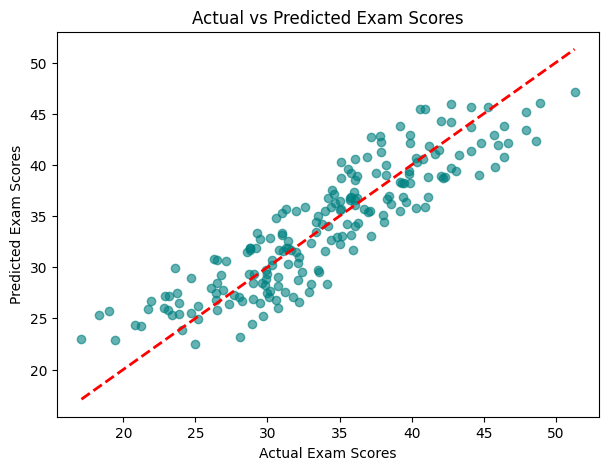

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

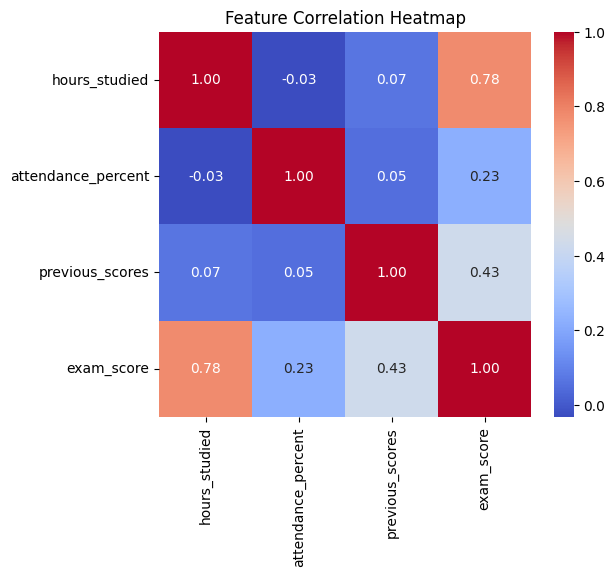

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = np.mean(cv_scores)

print(f"\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score (5-Fold Mean): {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 2.5489
Mean Squared Error (MSE): 9.2022
R² Score (5-Fold Mean): 0.7942
